In [116]:
import numpy as np
import matplotlib.pyplot as plt

### Алгоритм Флойда - Уоршелла

https://en.wikipedia.org/wiki/Floyd–Warshall_algorithm

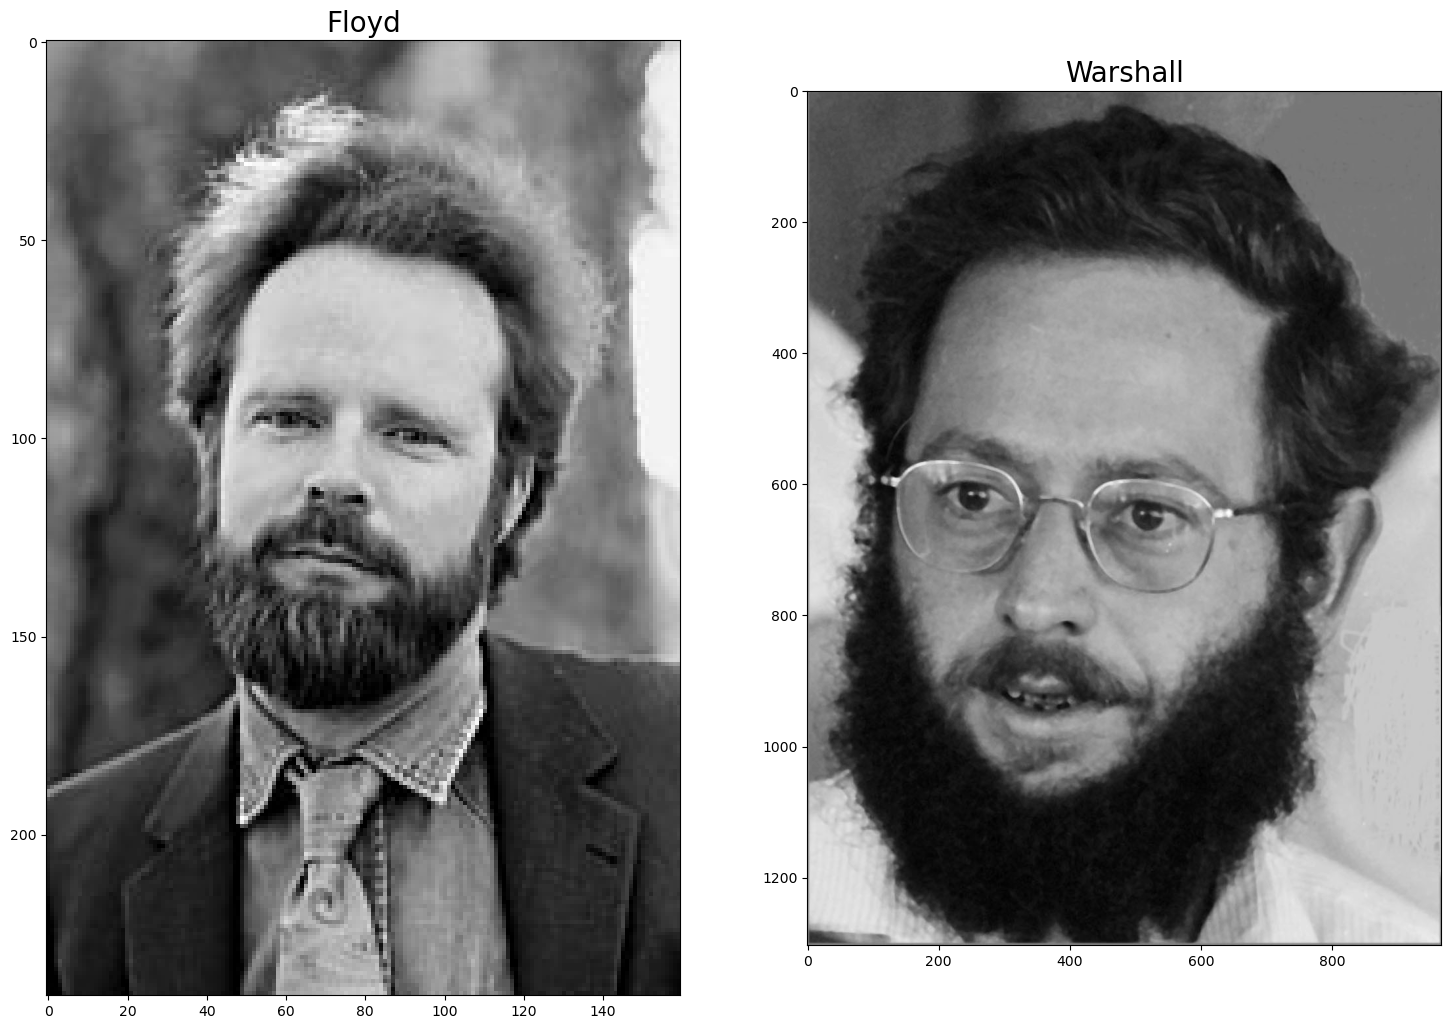

In [138]:
fig, axes = plt.subplots(1, 2, figsize = (18, 18))

axes[0].imshow(skimage.io.imread('Robert_Floyd.jpg'), cmap = 'gray')
axes[0].set_title('Floyd', size = 20)
axes[1].imshow(skimage.io.imread('S_Warshall.jpg'), cmap = 'gray')
axes[1].set_title('Warshall', size = 20)
None

Условия на граф: веса - любые, нет цикла отрицательного веса 

находит длины кратчайших путей между всеми вершинами в графе

время работы - O(n^3), 
расход памяти - O(n^2)

In [2]:
INF = 10e3

def floyd(G):
    dist = G

    for r in range(len(G)):
        for p in range(len(G)):
            for q in range(len(G)):
                dist[p][q] = min(dist[p][q], dist[p][r] + dist[r][q])
    
    graph_printer(dist)
    print(f' minumim distance from 0 vert to {len(dist)} vert is {dist[0][-1]}')
    return dist

def graph_printer(dist):
    for p in range(len(G)):
        for q in range(len(G)):
            if(dist[p][q] == INF):
                print("INF", end=" ")
            else:
                print(dist[p][q], end="  ")
        print(" ")

In [3]:
G = [[0, 5, INF, INF],
    [50, 0, 15, 5],
    [30, INF, 0, 15],
    [15, INF, 5, 0]]

distance = floyd(G)

0  5  15  10   
20  0  10  5   
30  35  0  15   
15  20  5  0   
 minumim distance from 0 vert to 4 vert is 10


#### что случится, если сделать цикл отрицательного веса?

In [4]:
G = [[0, -1],
    [-1, 0]]

distance = floyd(G)

-2  -3   
-3  -4   
 minumim distance from 0 vert to 2 vert is -3


#### на диагонали появляются отрицательные значения (а были 0 изначально)

т е с помощью алгоритма Флойда Уоршелла можно обнаружить цикл отрицательного веса!

In [5]:
def floyd_neg(G):
    dist = G

    for r in range(len(G)):
        for p in range(len(G)):
            for q in range(len(G)):
                dist[p][q] = min(dist[p][q], dist[p][r] + dist[r][q])
    
    graph_printer(dist)
    
    if any(val < 0 for val in [dist[i][i] for i in range(len(dist))]):
        print(' oh,no! есть цикл отрицательного веса ')
        return dist
        
    print(f' minumim distance from 0 vert to {len(dist)} vert is {dist[0][-1]}')

    return dist

In [6]:
G = [[0, -1],
    [-1, 0]]

distance = floyd_neg(G)

-2  -3   
-3  -4   
 oh,no! есть цикл отрицательного веса 


#### найдем найдем потенциал каждой вершины с помощью алгоритма Форда-Беллмана

https://habr.com/ru/company/otus/blog/484382/

phi(u) = distance(s,u)

s - фиктивная вершина, соединенная со всеми вершинами графа

In [95]:
class Graph:

    def __init__(self, vertices):
        self.V = vertices   
        self.graph = [] 
        
    def add_vert(self):
        self.V+=1
        
    def add_edge(self, s, d, w):
        self.graph.append([s, d, w])

    def print_solution(self, dist):
        print("Vertex Distance from Source")
        for i in range(self.V):
            print("{0}\t\t{1}".format(i, dist[i]))

    def bellman_ford(self, src):
        dist = [float("Inf")] * self.V
        dist[src] = 0
        for _ in range(self.V - 1):
            for s, d, w in self.graph:
                if dist[s] != float("Inf") and dist[s] + w < dist[d]:
                    dist[d] = dist[s] + w

      
        for s, d, w in self.graph:
            if dist[s] != float("Inf") and dist[s] + w < dist[d]:
                print("Graph contains negative weight cycle")
                return

        self.print_solution(dist)
        return dist


g = Graph(5)
g.add_edge(0, 1, -5)
g.add_edge(0, 2, 4)
g.add_edge(1, 3, 3)
g.add_edge(2, 1, 6)
g.add_edge(3, 2, 3)
g.add_edge(0, 4, -2)

print(g.bellman_ford(0), '\nbefore adding S0\n')

g.add_vert()
for i in range(g.V-1):
    g.add_edge(g.V-1, i, 0)

phi = g.bellman_ford(g.V-1)

Vertex Distance from Source
0		0
1		-5
2		1
3		-2
4		-2
[0, -5, 1, -2, -2] 
before adding S0

Vertex Distance from Source
0		0
1		-5
2		0
3		-2
4		-2
5		0


#### изменим веса ребер, чтобы можно было запустить алгоритм Дейкстры

https://ru.wikipedia.org/wiki/Алгоритм_Дейкстры

w(u,v)' = w(u,v) + phi(u) - phi(v)

In [96]:
g_new = Graph(g.V-1)

for u, v, w in g.graph:
    if u!=g.V-1:
        g_new.add_edge(u, v, w + phi[u] - phi[v])
g_new.graph

[[0, 1, 0], [0, 2, 4], [1, 3, 0], [2, 1, 11], [3, 2, 1], [0, 4, 0]]

#### запустим алгоритм Дейкстры

In [97]:
def from_list_to_table(l, n):
    table = [[-1 for col in range(n)] for row in range(n)]
    for u, v, w in l:
        table[u][v] = w
    return table

In [105]:
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \t Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])

    def minDistance(self, dist, sptSet):
        min = 1e7

        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index
 

    def dijkstra(self, src):
        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
            u = self.minDistance(dist, sptSet)            
            sptSet[u] = True

            for v in range(self.V):
                if (self.graph[u][v] > -1 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]
     
        self.printSolution(dist)
        return dist
 

src = 0
g = Graph(g_new.V)
g.graph = from_list_to_table(g_new.graph, g_new.V)
g.graph[src][src] = 0
dist = g.dijkstra(src)

Vertex 	 Distance from Source
0 		 0
1 		 0
2 		 1
3 		 0
4 		 0


#### вернем настоящие значения весов

w(u,v) = w(u,v)' - phi(u) + phi(v) 

In [106]:
for i in range(len(dist)):
    dist[i]+=phi[i] - phi[src]
dist

[0, -5, 1, -2, -2]

та-даам, знаем кратчайшее расстояние между вершиной src и всеми остальными

## Остовное дерево. Построение с помощью dfs, bfs

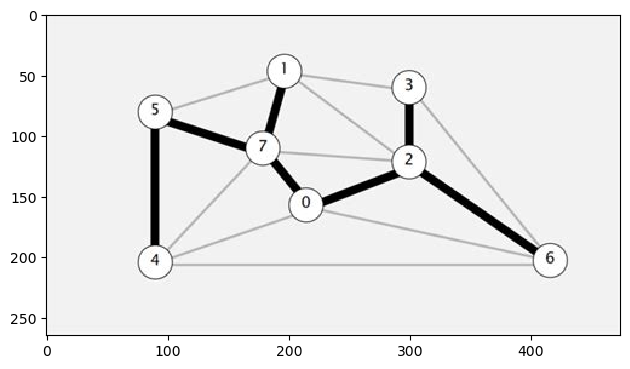

In [157]:
skimage.io.imshow('s_t.jpeg')

Note! граф должен быть связным и неориентированным

In [155]:
class Graph():
    def __init__(self, num_vertices):
        self.V = num_vertices
        self.graph = [[0 for column in range(num_vertices)] for row in range(num_vertices)]
        self.visited = [False for _ in range(self.V)]
        self.path = []
        self.weight = 0
        
    def dfs(self, u):
        self.visited[u] = True
        
        for v in [i for i in range(len(g.graph[u])) if g.graph[u][i]>0]:
            if self.visited[int(v)] is False:
                print(u,v)
                self.path.append((u,v))
                self.weight+=self.graph[u][v]
                self.dfs(v)
                
        return self.path, self.weight
    
    def bfs(self, u):
        self.weight = 0
        self.visited[u] = True
        queue = [u]
 
        while queue:        
            m = queue.pop(0) 
            print (m, end = " ") 

            for v in [i for i in range(len(g.graph[m])) if g.graph[m][i]>0]:
                if self.visited[int(v)] is False:
                    self.visited[v] = True
                    queue.append(v)
                    self.path.append((m,v))
                    self.weight+=self.graph[m][v]
            print(queue)
                    
        return self.path, self.weight

        
g = Graph(5)
g.graph = [[0, 2, 4, 6, 0],
           [2, 0, 3, 8, 5],
           [0, 3, 0, 3, 0],
           [6, 8, 0, 0, 0],
           [0, 5, 7, 9, 0]]
 
g.bfs(0)
# g.dfs(0)

0 [1, 2, 3]
1 [2, 3, 4]
2 [3, 4]
3 [4]
4 []


([(0, 1), (0, 2), (0, 3), (1, 4)], 17)

## Минимальное остовное дерево

In [139]:
class Graph():
    INF = 999999
    def __init__(self, num_vertices):
        self.V = num_vertices
        self.graph = [[0 for column in range(num_vertices)] for row in range(num_vertices)]
  
    def printMST(self, parent):
        print("Edge     Weight")
        for i in range(1, self.V):
            print(f"{parent[i]} - {i}  {self.graph[i][parent[i]]}")
  
  
    def minKey(self, key, mstSet):
        min = self.INF
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
        return min_index
  
    def prims(self):
        key = [self.INF for _ in range(self.V)]
        parent = [None for _ in range(self.V)]
        key[0] = 0
        mstSet = [False for _ in range(self.V)]
        parent[0] = -1
 
        for _ in range(self.V):
            u = self.minKey(key, mstSet)
            mstSet[u] = True

       
            for v in range(self.V):
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u
 
        self.printMST(parent)
 
g = Graph(5)
g.graph = [ [0, 2, 0, 6, 0],
           [2, 0, 3, 8, 5],
           [0, 3, 0, 0, 7],
           [6, 8, 0, 0, 9],
           [0, 5, 7, 9, 0]]
 
g.prims()

Edge     Weight
0 - 1  2
1 - 2  3
0 - 3  6
1 - 4  5
